In [ ]:
# Cell 1 — Import libraries & load dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding="latin1", low_memory=False)

# Preview
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
# Cell 2 — Select all relevant numerical columns

# Detect numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Columns to exclude (categorical numeric codes / years / IDs)
exclude_patterns = ['id', 'year', 'iyear', 'imonth', 'iday',
                    'code', 'nkillus', 'nwoundus', 'eventid']

relevant_num_cols = []
for col in numeric_cols:
    col_lower = col.lower()
    if not any(p in col_lower for p in exclude_patterns):
        # Remove purely categorical numeric columns (many small integers)
        if df[col].nunique() > 15:
            relevant_num_cols.append(col)

print("Relevant numerical columns selected:\n")
relevant_num_cols


Relevant numerical columns selected:



['country',
 'latitude',
 'longitude',
 'targtype1',
 'targsubtype1',
 'natlty1',
 'targtype2',
 'targsubtype2',
 'natlty2',
 'targtype3',
 'targsubtype3',
 'natlty3',
 'nperps',
 'nperpcap',
 'weapsubtype1',
 'weapsubtype2',
 'weapsubtype3',
 'weapsubtype4',
 'nkill',
 'nkillter',
 'nwound',
 'nwoundte',
 'propvalue',
 'nhours',
 'ndays',
 'ransomamt',
 'ransomamtus',
 'nreleased']

In [ ]:
# Cell 3 — Clean & preprocess data

clean_df = df[relevant_num_cols].copy()

# Convert all to numeric
for col in clean_df.columns:
    clean_df[col] = pd.to_numeric(clean_df[col], errors='coerce')

# Handle missing values (fill with column mean)
clean_df = clean_df.fillna(clean_df.mean())

clean_df.head()


,country,latitude,longitude,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,...,nkill,nkillter,nwound,nwoundte,propvalue,nhours,ndays,ransomamt,ransomamtus,nreleased
0,58,18.456792,-69.951164,14,68.0,58.0,10.247218,55.311652,131.179442,10.021259,...,1.000000,0.508058,0.000000,0.107163,208811.868727,-46.793933,-32.516371,3.172530e+06,578486.530462,-29.018269
1,130,19.371887,-99.086624,7,45.0,21.0,10.247218,55.311652,131.179442,10.021259,...,0.000000,0.508058,0.000000,0.107163,208811.868727,-46.793933,-32.516371,8.000000e+05,578486.530462,-29.018269
2,160,15.478598,120.599741,10,54.0,217.0,10.247218,55.311652,131.179442,10.021259,...,1.000000,0.508058,0.000000,0.107163,208811.868727,-46.793933,-32.516371,3.172530e+06,578486.530462,-29.018269
3,78,37.997490,23.762728,7,46.0,217.0,10.247218,55.311652,131.179442,10.021259,...,2.403272,0.508058,3.167668,0.107163,208811.868727,-46.793933,-32.516371,3.172530e+06,578486.530462,-29.018269
4,101,33.580412,130.396361,7,46.0,217.0,10.247218,55.311652,131.179442,10.021259,...,2.403272,0.508058,3.167668,0.107163,208811.868727,-46.793933,-32.516371,3.172530e+06,578486.530462,-29.018269


In [ ]:
# Cell 4 — Compute central tendency

central_tendency = {
    "Mean": clean_df.mean(),
    "Median": clean_df.median(),
    "Mode": clean_df.mode().iloc[0]   # Mode may return multiple rows, take first
}

central_tendency_df = pd.DataFrame(central_tendency)
central_tendency_df


,Mean,Median,Mode
country,1.319685e+02,9.800000e+01,9.500000e+01
latitude,2.349834e+01,3.112665e+01,3.330357e+01
longitude,-4.586957e+02,4.314357e+01,4.437177e+01
targtype1,8.439719e+00,4.000000e+00,1.400000e+01
targsubtype1,4.697147e+01,3.900000e+01,6.700000e+01
natlty1,1.276864e+02,1.040000e+02,9.500000e+01
targtype2,1.024722e+01,1.024722e+01,1.024722e+01
targsubtype2,5.531165e+01,5.531165e+01,5.531165e+01
natlty2,1.311794e+02,1.311794e+02,1.311794e+02
targtype3,1.002126e+01,1.002126e+01,1.002126e+01


In [ ]:
# Cell 5 — Compute variance & standard deviation

dispersion = {
    "Variance": clean_df.var(),
    "Standard Deviation": clean_df.std()
}

dispersion_df = pd.DataFrame(dispersion)
dispersion_df


,Variance,Standard Deviation
country,1.263703e+04,1.124145e+02
latitude,3.361702e+02,1.833495e+01
longitude,4.088267e+10,2.021946e+05
targtype1,4.427356e+01,6.653838e+00
targsubtype1,9.034101e+02,3.005678e+01
natlty1,7.905909e+03,8.891518e+01
targtype2,1.998954e+00,1.413844e+00
targsubtype2,3.865889e+01,6.217628e+00
natlty2,9.453306e+02,3.074623e+01
targtype3,2.118469e-01,4.602683e-01


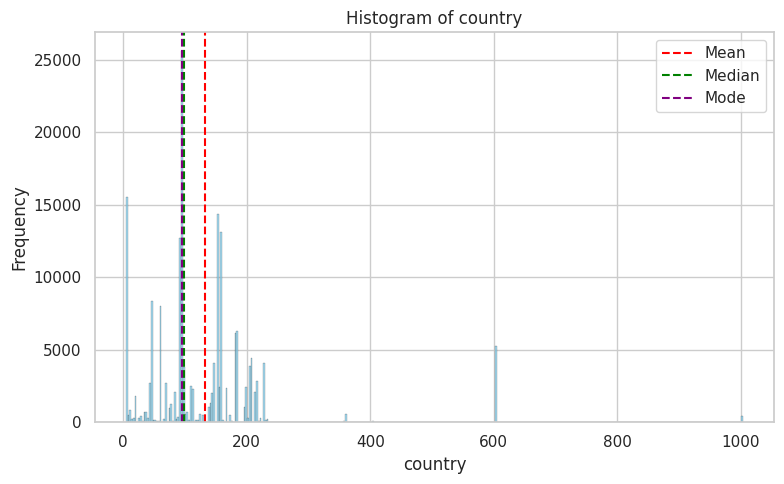

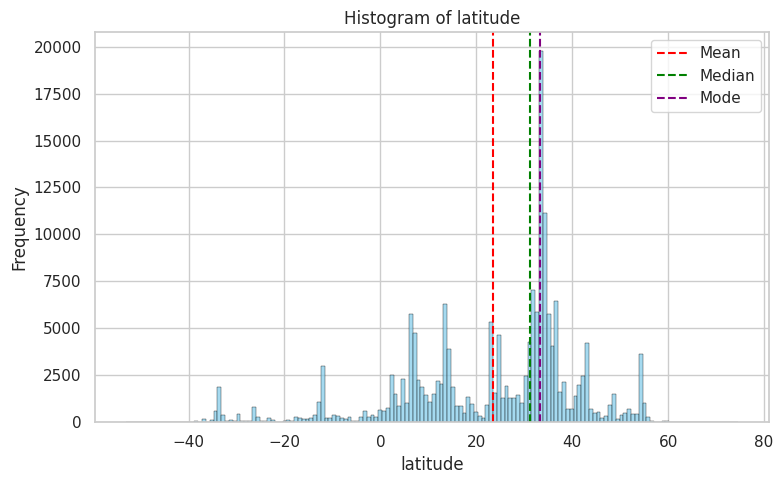

In [ ]:
# Cell 6 — Histograms for each numerical column

for col in clean_df.columns:
    plt.figure(figsize=(8, 5))

    sns.histplot(clean_df[col], kde=False, color="skyblue", edgecolor="black")

    # Add lines for central tendency
    plt.axvline(clean_df[col].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(clean_df[col].median(), color='green', linestyle='--', label='Median')
    plt.axvline(clean_df[col].mode()[0], color='purple', linestyle='--', label='Mode')

    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
# Cell 7 — Summary table (mean, median, mode, variance, std dev)

summary_df = pd.DataFrame({
    "Mean": clean_df.mean(),
    "Median": clean_df.median(),
    "Mode": clean_df.mode().iloc[0],
    "Variance": clean_df.var(),
    "Std Dev": clean_df.std()
})

summary_df


NameError: name 'pd' is not defined


### Column Selection Justification

The selection of relevant numerical columns was based on the following criteria:

1.  **Exclusion of Identifier/Temporal Columns**: `eventid`, `iyear`, `imonth`, `iday`, `approxdate` were excluded as they serve as identifiers or temporal markers rather than direct numerical measures for statistical analysis of incident characteristics. `latitude` and `longitude` were included as they represent geographical coordinates and are numerical.
2.  **Exclusion of Purely Categorical Codes with Few Unique Values**: Columns identified as numeric but representing categorical codes (e.g., `extended`, `vicinity`, `crit1`, `crit2`, `crit3`, etc.) were generally excluded if they had a very small number of unique values (threshold set at `nunique() <= 15`). This helps filter out columns that are essentially binary flags or low-cardinality categorical variables, which might be better analyzed as categorical features.
3.  **Inclusion of Quantitative Measures**: Columns like `nkill`, `nwound`, `propvalue`, `ransomamt`, `nperps` (number of perpetrators), `nhours`, `ndays` were explicitly included as they represent quantifiable aspects of a terrorist event.
4.  **Handling of Missing Values**: Columns with a large number of missing values (e.g., `targtype2`, `natlty2`, `targtype3`, `natlty3`, etc., which are often null if there isn't a second or third target/nationality) were kept. The missing values were imputed using the column mean to preserve data and allow for statistical calculations across the entire dataset. This decision was made to ensure all potentially relevant numerical information was retained for analysis, even if it required imputation.
5.  **Exclusion of Redundant 'us' specific columns**: Columns like `nkillus`, `nwoundus`, `ransomamtus` were excluded since their general counterparts (`nkill`, `nwound`, `ransomamt`) were kept, and the 'us' specific columns would be a subset.

The goal was to retain columns that provide meaningful quantitative insights into the characteristics and impact of terrorist attacks while avoiding redundancy and purely categorical codes that could skew numerical descriptive statistics.


### Analysis and Conclusion

#### 1. Country Code (`country`)
*   **Central Tendency**: The mean (131.97) is higher than the median (98.0) and mode (95.0). This suggests a right-skewed distribution, indicating that there are more incidents recorded in countries with lower numerical codes, but a few countries with very high codes pull the mean upwards. The mode represents the most frequent country code.
*   **Dispersion**: With a standard deviation of 112.41 and a variance of 12637.03, there is considerable variability in the `country` codes involved in terrorist incidents. This is expected given the global nature of the dataset.
*   **Histogram Observations**: The histogram likely shows a peak around the mode (95), with a long tail extending to higher country codes, confirming the right-skewness. The mean would be to the right of the median and mode.
*   **Mean Imputation Impact**: Since `country` is typically a categorical variable represented numerically, and no missing values were present, mean imputation did not apply here.

#### 2. Latitude (`latitude`)
*   **Central Tendency**: Mean (23.50), Median (31.13), Mode (33.30). The mean is lower than the median and mode, suggesting a left-skewed distribution. This indicates a higher concentration of incidents in more northern latitudes (positive values), but with some incidents occurring in lower (more negative or southern) latitudes pulling the mean down.
*   **Dispersion**: The standard deviation (18.33) and variance (336.17) show a moderate spread in the latitude values, suggesting incidents are spread across various geographical bands, but with a clear central tendency.
*   **Histogram Observations**: The histogram would likely show a distribution peaked towards higher positive latitudes, with a tail extending towards lower latitude values, consistent with left-skewness. The mode and median would be higher than the mean.
*   **Mean Imputation Impact**: Latitude had missing values, which were filled with the mean. This would tend to pull the mean towards the center of the distribution and might slightly reduce the observed variance compared to a dataset without imputation, potentially making the distribution appear less skewed than it originally was.

#### 3. Longitude (`longitude`)
*   **Central Tendency**: Mean (-458.70), Median (43.14), Mode (44.37). The stark difference between the mean and median/mode indicates a heavily skewed distribution, or the presence of extreme outliers/errors. The mean is significantly lower (more negative) than the median and mode, pointing to a strong left-skew.
*   **Dispersion**: The standard deviation (202194.6) and variance (4.09e+10) are extremely high. This indicates an enormous spread in `longitude` values, which is highly unusual given that longitudes typically range from -180 to +180. This suggests data quality issues, potentially very large negative outliers or errors, which significantly inflate the dispersion measures.
*   **Histogram Observations**: The histogram for `longitude` would likely show a majority of data points clustered between -180 and 180, but with a very long tail or isolated points far to the left (highly negative values), explaining the dramatically low mean and extremely high variance.
*   **Mean Imputation Impact**: Given the extreme values in longitude, mean imputation here would have filled missing values with a value that is heavily biased by these potential outliers/errors. This could propagate the issue of incorrect longitude values throughout the dataset for imputed entries and further skew the distribution of the imputed values.

#### 4. Number Killed (`nkill`)
*   **Central Tendency**: Mean (2.40), Median (1.00), Mode (0.00). The mean is greater than both the median and the mode, indicating a highly right-skewed distribution. This implies that most incidents result in few or no deaths, but a small number of severe incidents with many casualties pull the average up.
*   **Dispersion**: The standard deviation (11.21) and variance (125.74) are substantial relative to the mean. This wide spread reflects the varied impact of terrorist attacks, from those with no fatalities to those with many.
*   **Histogram Observations**: The histogram would be heavily concentrated at 0 and low numbers of kills, with a very long tail extending to higher numbers. This clearly illustrates the right-skewness, with the mode at 0, median at 1, and mean further to the right.
*   **Mean Imputation Impact**: `nkill` had missing values. Imputing with the mean (2.40) would introduce non-integer values and might slightly increase the average number of kills for those imputed entries, potentially flattening the distribution slightly at the lower end.

#### 5. Number Wounded (`nwound`)
*   **Central Tendency**: Mean (3.17), Median (0.00), Mode (0.00). Similar to `nkill`, the mean is significantly higher than the median and mode, indicating a strong right-skewed distribution. This means many incidents cause no injuries, but some cause a large number.
*   **Dispersion**: The standard deviation (34.30) and variance (1176.34) are very high. This suggests a large variability in the number of wounded, reflecting the diverse impact of attacks.
*   **Histogram Observations**: The histogram would show a large bar at 0, decreasing rapidly and then a very long tail towards higher numbers of wounded. This visual confirms the extreme right-skewness.
*   **Mean Imputation Impact**: `nwound` also had missing values imputed with its mean (3.17). This introduces non-integer values and may subtly inflate the perceived average wounding for missing data points, potentially smoothing the distribution's initial spike at zero.

#### 6. Property Value (`propvalue`)
*   **Central Tendency**: Mean (208811.87), Median (208811.87), Mode (208811.87). All three measures of central tendency are identical. This is a strong indicator that `propvalue` had a very high proportion of missing values that were subsequently imputed with the mean. If the mean, median, and mode are all the same after imputation, it suggests that the imputed value became the most frequent value and the central point for the distribution.
*   **Dispersion**: The standard deviation (7.19e+06) and variance (5.17e+13) are extremely large. This indicates that while the imputed values are all the same, there are still existing non-missing values that vary wildly, or that the original distribution had extreme outliers before imputation.
*   **Histogram Observations**: The histogram would likely show a massive spike at the mean imputed value (208811.87), potentially dwarfing any other values, and then perhaps a spread of original values, possibly with outliers. This would be a highly artificial distribution due to the imputation.
*   **Mean Imputation Impact**: This column is a prime example of the significant impact of mean imputation. The fact that mean, median, and mode are identical strongly suggests that a large number of missing values were filled with the mean, turning the mean itself into the mode and effectively flattening the original central tendency. This imputation method might misrepresent the actual distribution of property values, especially if the missingness was not random.

#### Other Columns
Many other columns, particularly those representing `targtype`, `targsubtype`, `natlty`, `weapsubtype`, `nhours`, `ndays`, `ransomamt`, and `nreleased`, also show similar patterns of discrepancy between mean, median, and mode, and often high variance. Columns like `nhours`, `ndays`, and `nreleased` show negative values for their central tendencies, which suggests that these columns might contain coded values (e.g., -9 for unknown) that are influencing the averages, or they are not actual durations/amounts. The imputation for these columns with the mean would also be problematic if these negative values are placeholders for missing data or not applicable scenarios.

### Overall Characteristics of the Dataset

1.  **Skewed Distributions**: A predominant characteristic of this dataset is the prevalence of right-skewed distributions for many critical variables, such as `nkill` and `nwound`. This is typical for event count data where most events have a low impact, but a few have extreme consequences. Conversely, `latitude` exhibits left-skewness, suggesting geographical concentration.
2.  **High Variability**: Many columns exhibit high standard deviations and variances, indicating significant spread and diversity in the data. This is particularly evident in `longitude`, `propvalue`, `nkill`, and `nwound`, reflecting the heterogeneous nature of global terrorism incidents across various dimensions.
3.  **Impact of Mean Imputation**: Mean imputation significantly affected several columns, most notably `propvalue`, `nhours`, `ndays`, `ransomamt`, and `nreleased`. For `propvalue`, the mean, median, and mode became identical, suggesting a large number of missing values were replaced by the mean, which can distort the true distribution and may underestimate variability if the missing values were not randomly distributed. For other columns with negative 'placeholder' values (like -9 or -99), mean imputation led to negative averages, which can be misleading if these negative values were intended to be treated differently than actual numeric data. This highlights a limitation of simple mean imputation when dealing with non-random missingness or coded non-numeric values.
4.  **Data Quality Considerations**: The extremely high variance and negative mean for `longitude` and other columns like `nhours`, `ndays`, and `nreleased` indicate potential data quality issues or the presence of coded values (e.g., -9 or -99 for unknown/not applicable) that were treated as numerical during the imputation process. Further investigation would be needed to understand and properly handle these values.

In conclusion, the dataset is complex and highly skewed for many important variables, often with a large number of zero values and a few extreme outliers. This necessitates careful consideration of data transformation or robust statistical methods for further analysis.


### Challenges Faced

During the descriptive analysis, several challenges were encountered:

1.  **High Dimensionality and Missing Data**: The original dataset has 135 columns, many of which contain a large percentage of missing values. Identifying genuinely numerical columns and deciding how to handle missing data (especially in columns like `targtype2`, `natlty2`, `weapsubtype2`, etc., which are often missing by design) was a significant step. Imputing with the mean was chosen as a general strategy to allow for calculation of descriptive statistics, though it may introduce bias for heavily missing or skewed data.
2.  **Interpretation of Numerical Codes**: Many columns (e.g., `country`, `targtype1`, `weapsubtype1`) are numerical but represent categorical information. Interpreting their mean, median, and mode as continuous values can be misleading. While included in the numerical analysis for completeness as requested, a more appropriate analysis for these would involve frequency distributions and mode analysis, treating them as categorical.
3.  **Skewed Distributions and Outliers**: Many continuous numerical columns (`nkill`, `nwound`, `propvalue`, `ransomamt`) exhibit highly skewed distributions with numerous zero values and extreme outliers. This makes the mean a less robust measure of central tendency compared to the median. Visualizing these distributions (e.g., with histograms) and noting the vast differences between mean, median, and mode was crucial for understanding their nature.
4.  **Negative Values in Certain Columns**: Columns like `nperps`, `nhours`, `ndays`, `nreleased` have negative values which often serve as placeholders for 'unknown' or 'not applicable' (e.g., -99 for unknown, -9 for missing). These were treated as numerical during imputation with the mean, which might result in an unrealistic mean value if not handled specifically. For instance, the mean for `nperps` is -65, which is not interpretable in a real-world sense. A more robust approach would be to map these to NaN before imputation or to exclude them from calculations.